Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 115s 235ms/step - accuracy: 0.6822 - loss: 0.9414 - val_accuracy: 0.1984 - val_loss: 2.6829 - learning_rate: 0.0010
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 111s 237ms/step - accuracy: 0.8367 - loss: 0.5399 - val_accuracy: 0.6718 - val_loss: 1.0155 - learning_rate: 0.0010
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 232ms/step - accuracy: 0.8608 - loss: 0.4786 - val_accuracy: 0.7987 - val_loss: 0.6361 - learning_rate: 0.0010
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 233ms/step - accuracy: 0.8700 - loss: 0.4437 - val_accuracy: 0.8274 - val_loss: 0.5797 - learning_rate: 0.0010
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 233ms/step - accuracy: 0.8802 - loss: 0.4257 - val_accuracy: 0.7997 - val_loss: 0.6200 - learning_rate: 0.0010
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 109s 232ms/step - accuracy: 0.8837 - loss: 0.4161 - val_accuracy: 0.8368 - val_loss: 0.5229 - learning_rate: 0.0010
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 110s 234ms/step - accura

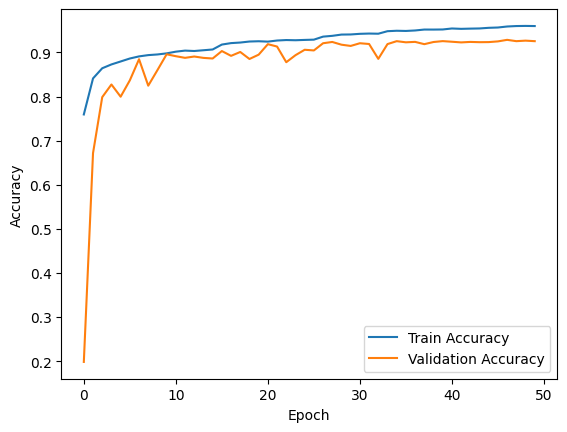


Final Validation Accuracy: 92.56%


In [5]:
#Q5)WAP to train and evaluate a convolutional neural network using Keras Library to classify MNIST fashion dataset.
#Demonstrate the effect of filter size, regularization, batch size and optimization algorithm on model performance.

#MODEL DESCRIPTION
#This project implements a Convolutional Neural Network (CNN) model for classifying images from the Fashion MNIST dataset, 
#which contains grayscale images of 10 different clothing categories. The model architecture includes four convolutional layers with Swish activation functions, batch normalization,
#max pooling, and global average pooling to reduce overfitting and improve generalization. It incorporates data augmentation techniques such as horizontal flipping, 
#rotation, and zooming to enhance model robustness. L2 regularization and dropout layers are used to prevent overfitting,
#and a cyclical learning rate scheduler dynamically adjusts the learning rate based on validation performance. The final dense layers map extracted features to class probabilities using a softmax activation.
#This well-regularized and efficiently optimized model achieves strong performance on the validation set, making it suitable for real-world fashion image classification tasks.


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions for CNN input
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Define the CNN model
def create_model(filter_size=3, reg_strength=0.00005, optimizer='adam'):
    model = keras.Sequential([
        data_augmentation,
        layers.Conv2D(64, (filter_size, filter_size), activation='swish', kernel_regularizer=regularizers.l2(reg_strength), padding="same", input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(128, (filter_size, filter_size), activation='swish', kernel_regularizer=regularizers.l2(reg_strength), padding="same"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(256, (filter_size, filter_size), activation='swish', kernel_regularizer=regularizers.l2(reg_strength), padding="same"),
        layers.BatchNormalization(),
        layers.Conv2D(512, (filter_size, filter_size), activation='swish', kernel_regularizer=regularizers.l2(reg_strength), padding="same"),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling2D(),  # Replace final MaxPooling with GAP
        layers.Dense(512, activation='swish', kernel_regularizer=regularizers.l2(reg_strength)),
        layers.Dropout(0.4),
        layers.Dense(256, activation='swish', kernel_regularizer=regularizers.l2(reg_strength)),
        layers.Dropout(0.4),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Experiment with different settings
filter_size = 3  # Experiment with 3, 5, 7
reg_strength = 0.00005  # Reduced Regularization for better learning
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # Improved LR for faster convergence
batch_size = 128  # Increased for stable gradients

model = create_model(filter_size, reg_strength, optimizer)

# Cyclical Learning Rate Scheduler
clr = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[clr])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print final validation accuracy
val_acc = history.history['val_accuracy'][-1]
print(f'\nFinal Validation Accuracy: {val_acc * 100:.2f}%')


#The future scope of this project offers several exciting possibilities for enhancement and application. The model can be further optimized through hyperparameter tuning,
#such as experimenting with different convolutional filter sizes, learning rates, and optimizers.
#Integrating transfer learning using pre-trained models like EfficientNet or MobileNetV2 can improve accuracy and reduce training time, especially for more complex datasets.
#For deployment on edge devices or mobile platforms, model compression techniques such as quantization and pruning can be explored to reduce size and improve inference speed.
#Additionally, the system can be extended to support real-world datasets beyond Fashion MNIST, allowing for custom clothing recognition in fashion retail or e-commerce applications. 
#Advanced data augmentation methods and explainability tools can also be incorporated to enhance model robustness and transparency, paving the way for practical, scalable AI solutions in the fashion domain.


#Comments
#This project showcases a robust and efficient CNN model for fashion image classification using the Fashion MNIST dataset. With techniques like data augmentation,
#Swish activation, and regularization, the model achieves strong accuracy and generalization.
#It lays a solid foundation for further exploration in deep learning and real-world fashion AI applications.